In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from loguru import logger
import os

# OCR Only

In [13]:
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_only_math.csv"

# Read the CSV file
df_standard_ocr_only = pd.read_csv(filename)
print(df_standard_ocr_only)

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment
                                               Prompt  GT_Keyframe  Top_1  \
0        what is a binomial probability distribution?           18     81   
1     x is a specific number of successes in n trials           25     27   
2                                        P(F) = 1 -p            23     60   
3   what procedures does the binomial probability ...           29     81   
4           What is the binomial probability formula?           58     86   
5   What is the method 2 for finding the binomial ...           80     81   
6   How many NFL Football games betweem 1974 and 2...           85     85   
7            What are the key concepts of the lecture            3      2   
8   What is the probability of failure in the twit...           46     46   
9                 Using the given values of n x and q           65     27   
10  probability of success remains the same in all...           22     26   

    

In [15]:
def calculate_and_plot_gt_keyframe_percentage(data):
    # Convert data to a DataFrame
    df = pd.DataFrame(data)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    total = len(df)
    top_1_count = 0
    top_2_count = 0
    top_3_count = 0
    
    # Iterate through the DataFrame to count the occurrences
    for index, row in df.iterrows():
        if row['GT_Keyframe'] == row['Top_1']:
            top_1_count += 1
        elif row['GT_Keyframe'] == row['Top_2']:
            top_2_count += 1
        elif row['GT_Keyframe'] == row['Top_3']:
            top_3_count += 1
    
    # Calculate percentages
    top_1_percentage = (top_1_count / total) * 100
    top_2_percentage = (top_2_count / total) * 100
    top_3_percentage = (top_3_count / total) * 100
    
    # Print the results
    print(f"GT_Keyframe in Top 1: {top_1_percentage:.2f}%")
    print(f"GT_Keyframe in Top 2: {top_2_percentage:.2f}%")
    print(f"GT_Keyframe in Top 3: {top_3_percentage:.2f}%")
    
    # Data for plotting
    labels = ['Top 1', 'Top 2', 'Top 3']
    percentages = [top_1_percentage, top_2_percentage, top_3_percentage]
    
    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=['blue', 'green', 'red'])
    plt.xlabel('Position')
    plt.ylabel('Percentage')
    plt.title('Percentage of GT_Keyframe in Top Positions \n (OCR Only)')
    plt.ylim(0, 100)
    
#hard coded
img_paths = 150

def check_proximity_keyframes(gt):
    proximity_kf = []

    # Define the boundaries for the image paths
    max_index = img_paths - 1

    if gt == 0:
        logger.info("No proximity - Invalid GT")
    elif gt == 1:
        proximity_kf.extend(range(1, 5))
    elif gt >= max_index:
        proximity_kf.extend(range(max_index, max_index - 5, -1))
    else:
        proximity_kf.extend([gt - 2, gt - 1, gt, gt + 1, gt + 2])

    # Ensure all indexes are within valid range
    proximity_kf = [i for i in proximity_kf if 0 <= i <= max_index]

    return proximity_kf


GT_Keyframe in Top 1: 18.18%
GT_Keyframe in Top 2: 18.18%
GT_Keyframe in Top 3: 9.09%


<Figure size 1000x600 with 0 Axes>

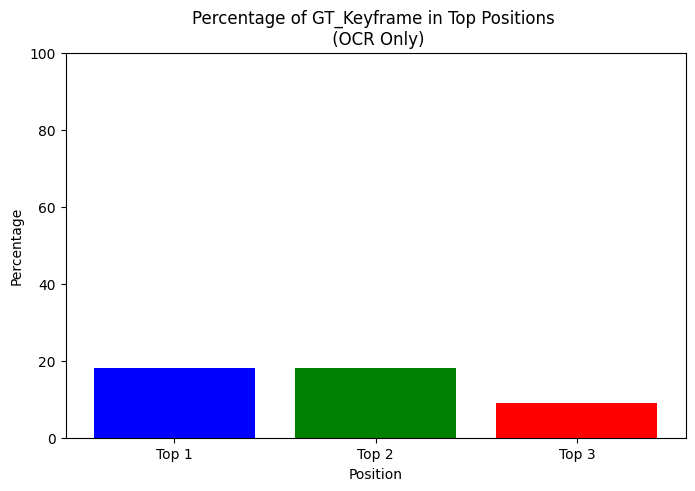

In [16]:
# call
calculate_and_plot_gt_keyframe_percentage(df_standard_ocr_only)

In [17]:
# iterate through data frame 
df = df_standard_ocr_only
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - what is a binomial probability distribution?
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - x is a specific number of successes in n trials
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - P(F) = 1 -p 
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - what procedures does the binomial probability distribution results from?
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - What is the binomial probability formula?
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - What is the method 2 for finding the binomial probabilities?
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - How many NFL Football games betweem 1974 and 2011 there is?
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - What are the key concepts of the lecture
2024-07-11 17:31:12.758 | INFO     | __main__:<module>:5 - What is the probability of failure in the twitter example?
2024-07-11 17:31:12.758 | I

# OCR LAVA

In [18]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_lava_math.csv"
df_ocr_lava = pd.read_csv(filename)
df_ocr_lava.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,what is a binomial probability distribution?,18,20,22,81
1,x is a specific number of successes in n trials,25,27,24,25
2,P(F) = 1 -p,23,59,26,58
3,what procedures does the binomial probability ...,29,20,21,22
4,What is the binomial probability formula?,58,86,60,81


GT_Keyframe in Top 1: 18.18%
GT_Keyframe in Top 2: 9.09%
GT_Keyframe in Top 3: 9.09%


<Figure size 1000x600 with 0 Axes>

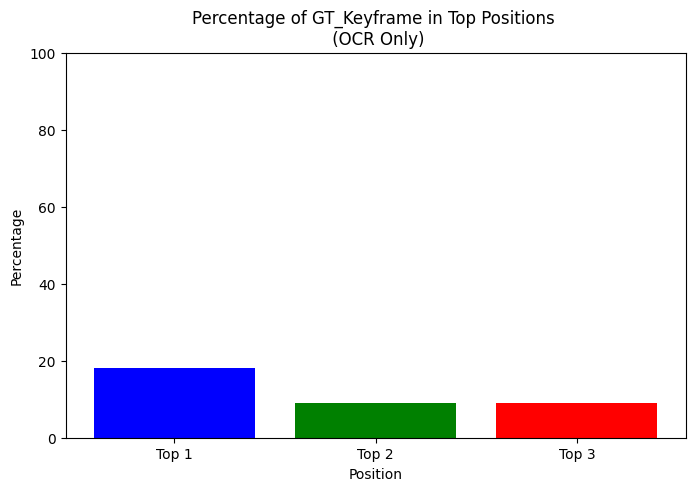

In [19]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_lava)

In [20]:
# iterate through data frame 
df = df_ocr_lava
# iterate through data frame 
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-11 17:31:14.324 | INFO     | __main__:<module>:6 - what is a binomial probability distribution?
2024-07-11 17:31:14.324 | INFO     | __main__:<module>:6 - x is a specific number of successes in n trials
2024-07-11 17:31:14.340 | INFO     | __main__:<module>:6 - P(F) = 1 -p 
2024-07-11 17:31:14.341 | INFO     | __main__:<module>:6 - what procedures does the binomial probability distribution results from?
2024-07-11 17:31:14.341 | INFO     | __main__:<module>:6 - What is the binomial probability formula?
2024-07-11 17:31:14.341 | INFO     | __main__:<module>:6 - What is the method 2 for finding the binomial probabilities?
2024-07-11 17:31:14.341 | INFO     | __main__:<module>:6 - How many NFL Football games betweem 1974 and 2011 there is?
2024-07-11 17:31:14.341 | INFO     | __main__:<module>:6 - What are the key concepts of the lecture
2024-07-11 17:31:14.341 | INFO     | __main__:<module>:6 - What is the probability of failure in the twitter example?
2024-07-11 17:31:14.341 | I

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# LLM Long Summary

In [21]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_llm_long_summary_math.csv"
df_long_summary = pd.read_csv(filename)
df_long_summary.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,what is a binomial probability distribution?,18,2,34,33
1,x is a specific number of successes in n trials,25,24,26,60
2,P(F) = 1 -p,23,27,25,26
3,what procedures does the binomial probability ...,29,19,34,33
4,What is the binomial probability formula?,58,86,60,59


GT_Keyframe in Top 1: 18.18%
GT_Keyframe in Top 2: 9.09%
GT_Keyframe in Top 3: 0.00%


<Figure size 1000x600 with 0 Axes>

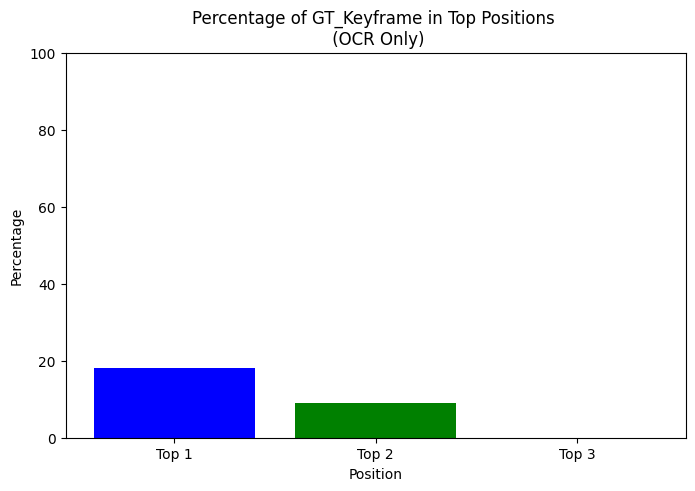

In [22]:
# call
calculate_and_plot_gt_keyframe_percentage(df_long_summary)

In [23]:
# iterate through data frame 
df = df_long_summary
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - what is a binomial probability distribution?
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - x is a specific number of successes in n trials
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - P(F) = 1 -p 
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - what procedures does the binomial probability distribution results from?
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - What is the binomial probability formula?
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - What is the method 2 for finding the binomial probabilities?
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - How many NFL Football games betweem 1974 and 2011 there is?
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - What are the key concepts of the lecture
2024-07-11 17:31:15.931 | INFO     | __main__:<module>:5 - What is the probability of failure in the twitter example?
2024-07-11 17:31:15.941 | I

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# OCR TRANSCRIPTIONS 

In [24]:
filename = notebook_path / "notebooks/new_data/df_standard_df_ocr_transcriptions_math.csv"

df_ocr_transcriptions = pd.read_csv(filename)
df_ocr_transcriptions.head()

,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,what is a binomial probability distribution?,18,80,81,86
1,x is a specific number of successes in n trials,25,24,27,25
2,P(F) = 1 -p,23,26,25,75
3,what procedures does the binomial probability ...,29,80,20,18
4,What is the binomial probability formula?,58,86,80,81


GT_Keyframe in Top 1: 27.27%
GT_Keyframe in Top 2: 9.09%
GT_Keyframe in Top 3: 9.09%


<Figure size 1000x600 with 0 Axes>

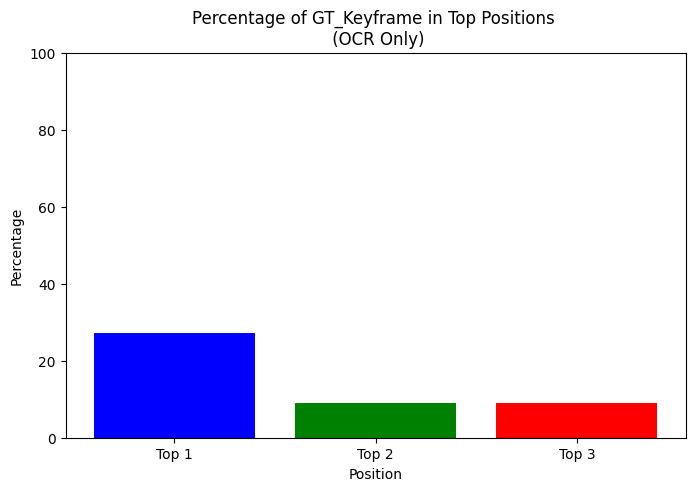

In [25]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_transcriptions)

In [26]:
df = df_ocr_transcriptions
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i] or row['Top_2'] in res[i] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - what is a binomial probability distribution?
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - x is a specific number of successes in n trials
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - P(F) = 1 -p 
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - what procedures does the binomial probability distribution results from?
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - What is the binomial probability formula?
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - What is the method 2 for finding the binomial probabilities?
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - How many NFL Football games betweem 1974 and 2011 there is?
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - What are the key concepts of the lecture
2024-07-11 17:31:17.764 | INFO     | __main__:<module>:4 - What is the probability of failure in the twitter example?
2024-07-11 17:31:17.764 | I

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
